44100
22050
[  0   0   0 ... -33 -32 -33]
[ 4.2922635e-04 -3.6231497e-05 -4.1279447e-05 ... -1.4863609e-03
 -2.4643522e-03 -1.6089685e-03]


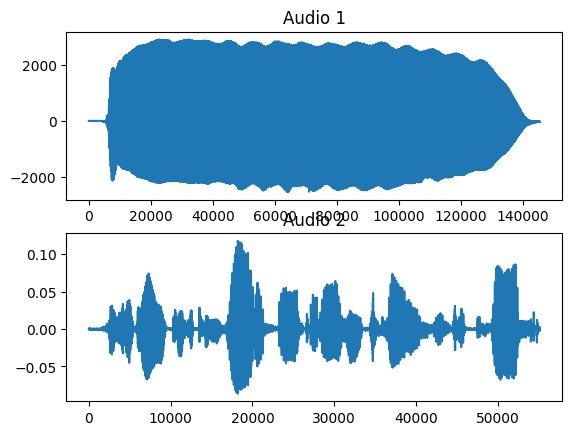

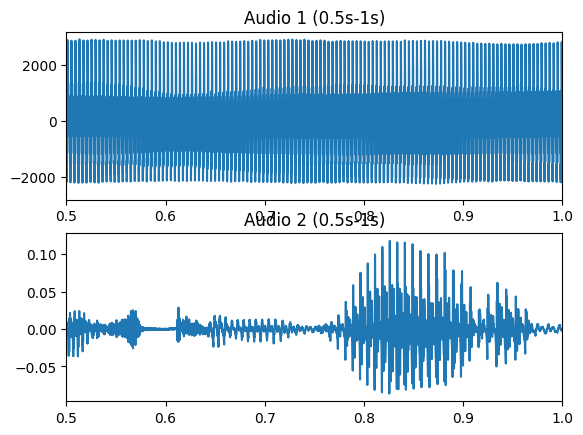

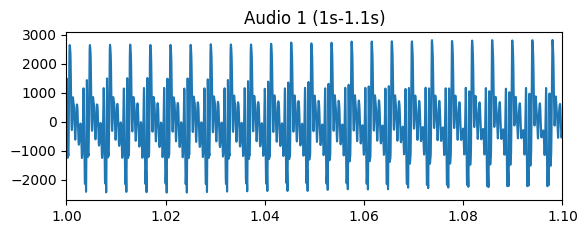

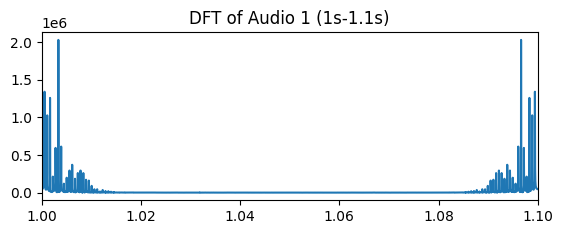

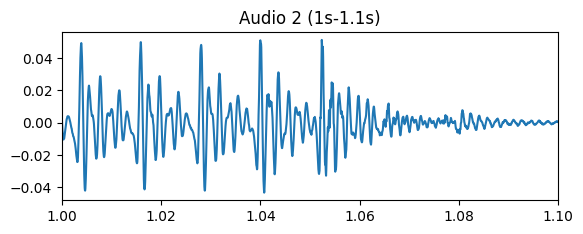

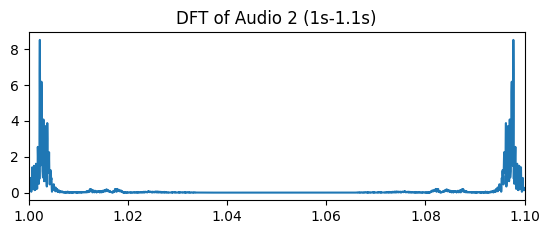

In [38]:
# Problem 2: Read an audio and observe the spectrum. (1 point)
# a) Read one of the provided audio files, play and plot the entire signal.
# b) Plot signal between 0.5 and 1 s.
# Do the following(c and d) in a loop (make it a function):
# c) Read the next 100 ms of the signal. (Hint: take into account fs; even better, make this
# frame length a parameter so you can always change it to a different value). Plot the signal.
# d) Apply DFT to this segment and plot the magnitude DFT.
# So the loop basically computes magnitude DFT for each of the 100 ms segments of the
# audio. You do not have to plot all the segments, only plotting the first segment and
# corresponding magnitude DFT is enough.


import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import sounddevice as sd

from scipy.fftpack import fft




fs1, audio1 = wavfile.read('audio1.wav')
fs2, audio2 = wavfile.read('audio2.wav')

print(fs1)
print(fs2)
print(audio1)
print(audio2)

Time1 = 1/fs1
Time2 = 1/fs2

number_of_samples1 = len(audio1)
number_of_samples2 = len(audio2)    

time1 = np.arange(number_of_samples1) * Time1
time2 = np.arange(number_of_samples2) * Time2   

# a) Read one of the provided audio files, play and plot the entire signal.

plt.subplot(2,1,1)

plt.plot(audio1)
plt.title('Audio 1')
sd.play(audio1) 
sd.wait() 



plt.subplot(2,1,2)
plt.plot(audio2)
plt.title('Audio 2')
sd.play(audio2)
sd.wait()

plt.show()

# b) Plot signal between 0.5 and 1 s.

plt.subplot(2,1,1)
plt.plot(time1, audio1)
plt.title('Audio 1 (0.5s-1s)')
plt.xlim(0.5,1)

plt.subplot(2,1,2)
plt.plot(time2, audio2)
plt.title('Audio 2 (0.5s-1s)')
plt.xlim(0.5,1)

plt.show()

# Do the following(c and d) in a loop (make it a function):
# c) Read the next 100 ms of the signal. (Hint: take into account fs; even better, make this
# frame length a parameter so you can always change it to a different value). Plot the signal.
# d) Apply DFT to this segment and plot the magnitude DFT.
# So the loop basically computes magnitude DFT for each of the 100 ms segments of the
# audio. You do not have to plot all the segments, only plotting the first segment and
# corresponding magnitude DFT is enough.

time_segment = 0.1
frame_length = 25
number_of_samples_segment1 = int(time_segment * fs1)
number_of_samples_segment2 = int(time_segment * fs2)



for i in range(11, frame_length):
    starting_point = int(i * number_of_samples_segment1)
    sliced_audio1 = audio1[starting_point:starting_point + number_of_samples_segment1]

    dft = fft(sliced_audio1)

    if i == 11:
        x = np.arange(10 * number_of_samples_segment1, 11 * number_of_samples_segment1) * Time1
    
        plt.subplot(2,1,1)
        plt.plot(x, sliced_audio1)
        plt.title('Audio 1 (1s-1.1s)')
        plt.xlim(1,1.1)
        plt.show()

        plt.subplot(2,1,2)
        plt.plot(x, np.abs(dft))
        plt.title('DFT of Audio 1 (1s-1.1s)')
        plt.xlim(1,1.1)
        plt.show()


for i in range(11, frame_length):
      starting_point = int(i * number_of_samples_segment2)
      sliced_audio2 = audio2[starting_point:starting_point + number_of_samples_segment2]

      dft = fft(sliced_audio2)

      if i == 11:
        x = np.arange(10 * number_of_samples_segment2, 11 * number_of_samples_segment2) * Time2
    
        plt.subplot(2,1,1)
        plt.plot(x, sliced_audio2)
        plt.title('Audio 2 (1s-1.1s)')
        plt.xlim(1,1.1)
        plt.show()

        plt.subplot(2,1,2)
        plt.plot(x, np.abs(dft))
        plt.title('DFT of Audio 2 (1s-1.1s)')
        plt.xlim(1,1.1)
        plt.show()

# e) Do the same for the other audio and analyze the difference in spectrum between the
# two audio examples. How does the spectrum of these signals differ from that of sum of sinusoids? 

# Audio files are different, which the one is harmony while the other is shorter . the frequency of the first audio is higher than the second one, so the dft magnitude is higher.

    
















